In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import os
from glob import glob

from path import Path

from numpy import mean
from numpy import std

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

from keras.utils import to_categorical


Using TensorFlow backend.


## Load Data

In [2]:
def get_frame_data(filepath):
    frame_data = pd.read_csv(filepath)
    
    x_data = frame_data.iloc[:, 0]
    y_data = frame_data.iloc[:, 1]
        
    h_stacked = np.hstack((x_data, y_data))
    
    return h_stacked

def get_frame_file_path(frame_file_path_template, frame_idx):
    frame_file_path = frame_file_path_template.replace("[frame_idx]", str(frame_idx))
    return frame_file_path

def get_label(sample_dir_name):
    return 0 if sample_dir_name[0] == 'b' else 1

def get_y_labels(sample_dir_names):
    return [get_label(l) for l in sample_dir_names]

def get_frames_count(root_path, sample_dir_name):
    return len([Path(f).abspath() for f in glob(f"{root_path}/{sample_dir_name}" + '/*')])

def get_frames(root_path, sample_dir_name):
    frames = []
    for frame_idx in range(0, get_frames_count(root_path, sample_dir_name)):
        frame_file_path_template = f"{root_path}/{sample_dir_name}/{sample_dir_name}.mov-[frame_idx]-0.csv"
        frame_file_path = get_frame_file_path(frame_file_path_template, frame_idx)
        frame_data = get_frame_data(frame_file_path)
        
        frames.append(frame_data)
        
    return np.dstack(frames)

def get_sample_idx_by_frames_count(frames_count, samples):
    sample_idx = 0
    
    for sample in samples:
        if len(sample) == frames_count:
            return sample_idx
        sample_idx = sample_idx + 1

def get_sample_name_by_frames_count(frames_count, samples, sample_dir_names):
    sample_idx = get_sample_idx_by_frames_count(frames_count, samples)
    return sample_dir_names[sample_idx]

In [3]:
root_path = "/Users/allarviinamae/EduWorkspace/openpose-jupyter-data-exploration/filtered-keypoints"

sample_dir_names = [n for n in os.listdir(root_path) if os.path.isdir(f"{root_path}/{n}")]

sample_dir_names

['backflip-40-margus',
 'flack-31-rasmus',
 'flack-19-rasmus',
 'flack-59-martin',
 'backflip-66-allar',
 'flack-55-martin',
 'flack-68-rasmus',
 'backflip-23-tiit',
 'flack-7-hendrik',
 'flack-4-martin',
 'flack-15-rasmus',
 'flack-36-hendrik',
 'backflip-64-allar',
 'backflip-6-rasmus',
 'flack-82-martin',
 'flack-35-margus',
 'backflip-38-mario',
 'flack-39-margus',
 'backflip-32-hendrik',
 'backflip-20-martin',
 'flack-25-margus',
 'flack-29-julia',
 'backflip-8-rasmus',
 'flack-80-martin',
 'backflip-4-rasmus',
 'backflip-54-rasmus',
 'backflip-48-joosep',
 'backflip-47-dagne',
 'flack-33-rasmus',
 'flack-61-martin',
 'flack-17-rasmus',
 'flack-57-martin',
 'flack-6-hendrik',
 'flack-37-hendrik',
 'flack-66-rasmus',
 'backflip-65-allar',
 'flack-84-martin',
 'backflip-31-hendrik',
 'flack-62-rasmus',
 'flack-50-kristiin',
 'flack-70-rasmus',
 'backflip-58-margus',
 'backflip-25-tiit',
 'backflip-24-tiit',
 'backflip-63-allar',
 'backflip-46-dagne',
 'backflip-56-margus',
 'backfli

In [4]:
y_labels = get_y_labels(sample_dir_names) # classifier labels, where 0 = backflip and 1 = flack

y_labels

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0]

In [5]:
samples = []
for sample_dir_name in sample_dir_names:
    frames = get_frames(root_path, sample_dir_name)
    squeezed = np.squeeze(frames)
    axes_swapped = np.swapaxes(squeezed, 0, 1)
    samples.append(axes_swapped)

In [6]:
shortest_sample = min([len(sample) for sample in samples])
longest_sample = max([len(sample) for sample in samples])

print(f"Shortest samples {shortest_sample}, longest sample {longest_sample}")

print(len(samples), samples[1].shape, len(y_labels))

Shortest samples 77, longest sample 110
113 (96, 50) 113


Text(0, 0.5, 'Samples')

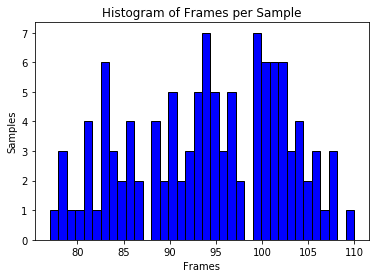

In [7]:
plt.hist([len(sample) for sample in samples], color = 'blue', edgecolor = 'black', bins = int(180/5))

# Add labels
plt.title('Histogram of Frames per Sample')
plt.xlabel('Frames')
plt.ylabel('Samples')

In [8]:
get_sample_name_by_frames_count(110, samples, sample_dir_names)

'backflip-50-joosep'

## Fit and Evaluate Model

In [9]:
y_labels_stacked = np.dstack(y_labels)
y_labels_categorical = to_categorical(y_labels_stacked) 
y_labels_squeezed = np.squeeze(y_labels_categorical)
print(f"All labels shape {y_labels_squeezed.shape}")

for idx, y_label_squeezed in enumerate(y_labels_squeezed):
    if idx == 5:
        break
    print(f"y_label_squeezed categorical: {y_label_squeezed}")

All labels shape (113, 2)
y_label_squeezed categorical: [1. 0.]
y_label_squeezed categorical: [0. 1.]
y_label_squeezed categorical: [0. 1.]
y_label_squeezed categorical: [0. 1.]
y_label_squeezed categorical: [1. 0.]


## Data exploration

In [20]:
print(f"Samples len: {len(samples)}")
print(f"One sample shape: {samples[0].shape}")
print(f"First dimension is timesteps and second is features")
print()

print(f"orig Y labels len: {len(y_labels)}")
print()

print(f"Y labels len: {len(y_labels_squeezed)}")
print(f"Y labels shape: {y_labels_squeezed.shape}")
print(f"First dimension is no. of samples and second is the categorical label value")


Samples len: 113
One sample shape: (83, 50)
First dimension is timesteps and second is features

orig Y labels len: 113

Y labels len: 113
Y labels shape: (113, 2)
First dimension is no. of samples and second is the categorical label value


In [17]:
def show_body_part_trajectories(samples, labels, body_part_nr=21, coord='Y', label=0):
    if coord == "Y":
        coord_root = 0
    elif coord == "X":
        coord_root = 25
        
    body_part_coord = coord_root + body_part_nr
    
    body_part_data = [[idx, -get_body_part_y_data(frame, body_part_nr)] for idx, frame in enumerate(frame_data)]

    df = pd.DataFrame(body_part_data, columns = ['Frames', 'Y values']) 

    fig = px.line(df, x='Frames', y='Y values', color_discrete_sequence=["black"])
    
    fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        "xaxis": {
            "showgrid": True,
            "zeroline": True,
            "gridcolor": "rgb(220, 220, 220)",
            'linecolor': 'rgb(220, 220, 220)',
        },
        "yaxis": {
            "showgrid": True,
            "gridcolor": "rgb(220, 220, 220)",
            'linecolor': 'rgb(220, 220, 220)',
        },
        'font': {
            'family': "Times New Roman, sans-serif",
            'size': 12,
            'color': "#7f7f7f"
        },   
    })
    
    fig.show()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.